In [1]:
import sys, os
import pandas as pd
import numpy as np

# We will be using Keras and its libraries for our Neural Network model training
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# As the model is trained on Google Colab, so mounting the drive
# from google.colab import drive
# drive.mount('/content/gdrive')

# Loading the dataset locally
df=pd.read_csv('C:/Users/Asad Shah/Documents/final/final/fer2013.csv')


Using TensorFlow backend.


# Exploratory Data Analysis

In [39]:
print(df.info())
print(df["Usage"].value_counts())

print(f"shape:{X_train.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64
shape:(28709, 48, 48, 1)


count    35887.000000
mean         3.323265
std          1.873819
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: emotion, dtype: float64


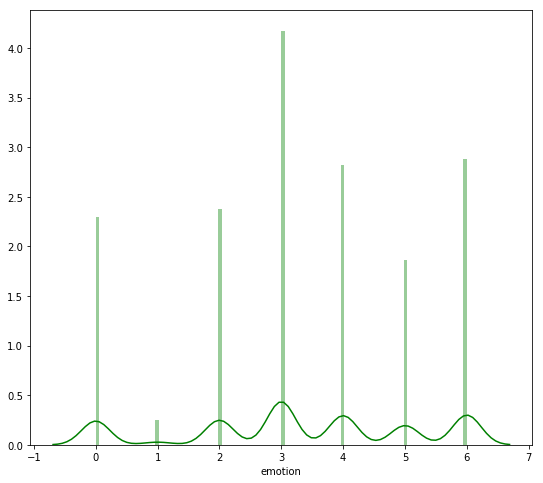

In [9]:
# Distribution of emotions
print(df['emotion'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['emotion'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [40]:
df.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [41]:
df.shape

(35887, 3)

In [42]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1234, 3)


In [43]:
df.count()

emotion    35887
pixels     35887
Usage      35887
dtype: int64

In [45]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [44]:
df = df.drop_duplicates()
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [8]:
df.count()

emotion    34653
pixels     34653
Usage      34653
dtype: int64

In [13]:
!pip install seaborn

In [2]:
import seaborn as sns

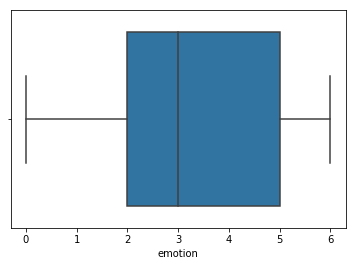

In [3]:
sns.boxplot(x=df['emotion'])

In [8]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Emotions')

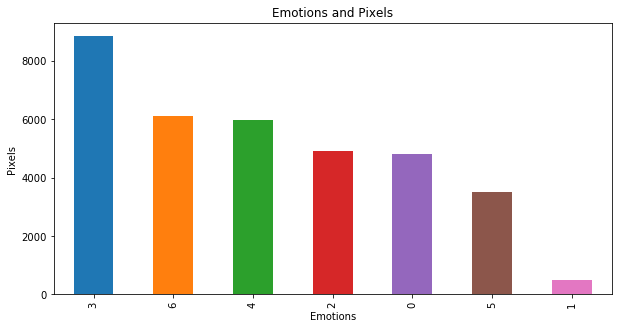

In [36]:
# Plotting a Histogram
df.emotion.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Emotions and Pixels')
plt.ylabel('Pixels')
plt.xlabel('Emotions')

,emotion
emotion,1.0


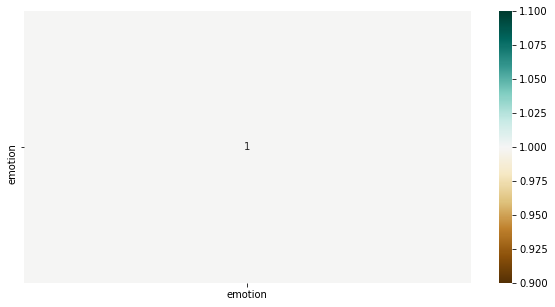

In [37]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

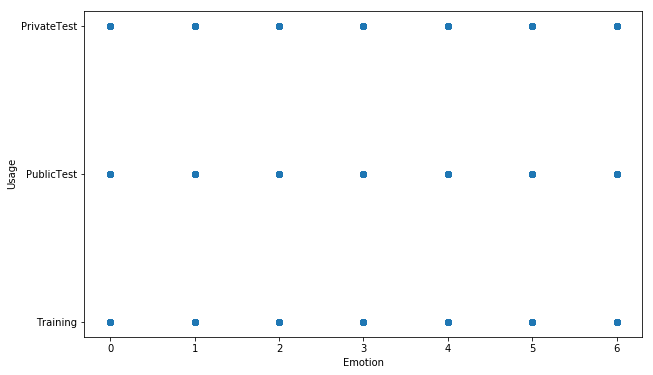

In [32]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['emotion'], df['Usage'])
ax.set_xlabel('Emotion')
ax.set_ylabel('Usage')
plt.show()

# Dividing Data into Training and Testing

In [2]:
# Train will be added to X_train and train_y, and Public Test will be added to X_test,test_y
X_train,train_y,X_test,test_y=[],[],[],[]

# Splitting the pixels as per train and test and storing into the list val
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

# Printing np arrays of the pixels
print(f"X_train sample data:{X_train[0:2]}")
print(f"train_y sample data:{train_y[0:2]}")
print(f"X_test sample data:{X_test[0:2]}")
print(f"test_y sample data:{test_y[0:2]}")

num_features = 64
num_labels = 7
batch_size = 64
epochs = 200
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)


#Normalizing data between 0 and 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)



X_train sample data:[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32), array([151., 150., 147., ..., 193., 183., 184.], dtype=float32)]
train_y sample data:[0, 0]
X_test sample data:[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32)]
test_y sample data:[0, 1]


# Model Training and Saving the moddel for future usage

In [8]:
# Designing the CNN model
# 1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

# Fully connected Neural Networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 64)          0         
__________

In [0]:

# Compliling the CNN model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")




Train on 28709 samples, validate on 3589 samples
Epoch 1/200
28709/28709 [==============================] - 11s 369us/step - loss: 1.7274 - acc: 0.2937 - val_loss: 1.5473 - val_acc: 0.3862
Epoch 2/200
28709/28709 [==============================] - 9s 328us/step - loss: 1.5182 - acc: 0.4059 - val_loss: 1.4057 - val_acc: 0.4377
Epoch 3/200
28709/28709 [==============================] - 9s 330us/step - loss: 1.4109 - acc: 0.4553 - val_loss: 1.3337 - val_acc: 0.4806
Epoch 4/200
28709/28709 [==============================] - 9s 329us/step - loss: 1.3445 - acc: 0.4830 - val_loss: 1.2841 - val_acc: 0.4999
Epoch 5/200
28709/28709 [==============================] - 9s 330us/step - loss: 1.3077 - acc: 0.4946 - val_loss: 1.2569 - val_acc: 0.5121
Epoch 6/200
28709/28709 [==============================] - 10s 331us/step - loss: 1.2674 - acc: 0.5167 - val_loss: 1.2304 - val_acc: 0.5252
Epoch 7/200
28709/28709 [==============================] - 9s 330us/step - loss: 1.2401 - acc: 0.5230 - val_loss: 1